Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Santosh Dhungana"
ID = "st123415"

---

# Lab 10: Unsupervised Learning with $k$-means and PCA

In this lab, we begin our survey of common unsupervised learning methods such as k-means and PCA.

## Supervised vs. Unsupervised Learning

As we know, in the supervised setting, we are presented with a set of training pairs $(\mathbf{x}^{(i)},y^{(i)}), \mathbf{x}^{(i)} \in {\cal X}, y^{(i)} \in {\cal Y},
i \in 1..m$,
where typically ${\cal X} = \mathbb{R}^n$ and either ${\cal Y} = \mathbb{R}$ (regression) or ${\cal Y} = \{ 1, \ldots, k \}$ (classification). The goal is, given a new
$\mathbf{x} \in {\cal X}$ to come up with the best possible prediction $\hat{y} \in {\cal Y}$ corresponding to $\mathbf{x}$ or a set of predicted probabilities
$p(y=y_i \mid \mathbf{x}), i \in \{1, \ldots, k\}$.

In the *unsupervised setting*, we are presented with a set of training items $\mathbf{x}^{(i)} \in {\cal X}$ without any labels or targets. The goal is generally to
understand, given a new $\mathbf{x} \in {\cal X}$, the relationship of $\mathbf{x}$ with the training examples $\mathbf{x}^{(i)}$.

The phrase *understand the relationship* can mean many different things depending on the problem setting. Among the most common specific goals is *clustering*, in which
we map the training data to $K$ *clusters*, then, given $\mathbf{x}$, find the most similar cluster $c \in \{1,\ldots,K\}$.

## $k$-means Clustering

Clustering is the most common unsupervised learning problem, and $k$-means is the most frequently used clustering algorithm. $k$-means is suitable when 
${\cal X} = \mathbb{R}^n$ and Euclidean distance is a reasonable model of dissimilarity between items in ${\cal X}$.

The algorithm is very simple:
1. Randomly initialize $k$ cluster centroids $\mu_1, \ldots, \mu_k \in \mathbb{R}^n$.
2. Repeat until convergence:
  1. For $i \in 1..m, c^{(i)} \leftarrow \text{argmin}_j \| \mathbf{x}^{(i)} - \mu_j \|^2.$
  2. For $j \in 1..k,$
     $$ \mu_j \leftarrow \frac{\sum_{i=1}^m \delta(c^{(i)} = j)\mathbf{x}^{(i)}}{\sum_{i=1}^m \delta(c^{(i)}=j)}$$

## In-Lab Exercise

Write Python code to generate 100 examples from each of three different well-separated 2D Gaussian distributions. Plot the data, initialize three arbitrary means,
and animate the process of iterative cluster assignment and cluster mean assignment.


<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    there's a naive implementation of the algorithm in this notebook below. You can use it or make your own implementation.
</details>

### Exercise 1.1 (5 points)

Generate 100 examples from each of **three different well-separated 2D Gaussian distributions**.

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html">make_blobs</a> function from sklearn for create dataset. Or you can make them yourself. :)
</details>

In [2]:
from sklearn.datasets import make_blobs
centers = [[-1, 0], [-10, -1], [5, -3]]
X,y = make_blobs(n_samples=300, centers=centers, cluster_std=1)


# YOUR CODE HERE
#raise NotImplementedError()

In [3]:
import numpy as np
print('X.shape', X.shape)
print('y.shape', y.shape)
print('X=\n', X[:5])
print('y=\n', y[:5])

print(y.min(), y.max())
print(len(np.unique(y)))

# Test function: Do not remove
assert X.shape == (300, 2), 'Size of X is incorrect'
assert y.shape == (300,) or y.shape == 300 or y.shape == (300,1), 'Size of y is incorrect'
assert len(np.unique(y)) == 3, 'Number groups of samples are incorrect'
for i in np.unique(y):
    assert isinstance(i, np.int64) or isinstance(i, int), 'group type is incorrect'

print("success!")
# End Test function

X.shape (300, 2)
y.shape (300,)
X=
 [[  4.62596199  -3.48909797]
 [-11.60858047  -1.73360392]
 [ -9.91227646  -0.20334625]
 [ -9.49979597  -0.81421526]
 [ -1.33026713  -1.02395467]]
y=
 [2 1 1 1 0]
0 2
3
success!


### Exercise 1.2 (5 points)

Plot the data. Separate the data by color.

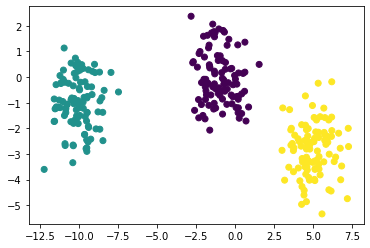

In [4]:
import matplotlib.pyplot as plt


plt.scatter(X[:,0],X[:,1],c = y)

# YOUR CODE HERE
#raise NotImplementedError()

**Expect result**:

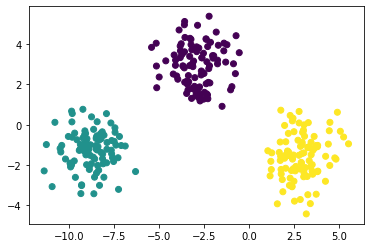

### Exercise 1.3 (20 points)

Initialize three arbitrary means, and animate the process of iterative cluster assignment and cluster mean assignment.

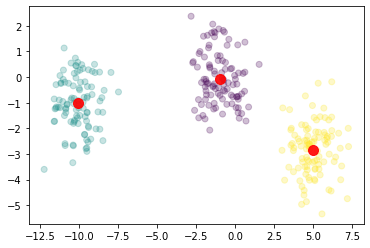

0.0


In [5]:
import numpy as np
from IPython.display import clear_output
from matplotlib.animation import FuncAnimation
import time
import random


# 1. initialize 3 random centers
index= np.arange(X.shape[0])
idx= random.shuffle(index)
k=3
m= X.shape[0]
centers = X[index[0:k], :]

#means= np.zeros((centers.shape))
C=np.zeros(m,dtype=int)
anim_lst =[]
error = 9999999999.0
count=0

#define animation function
while True:
    # 2. find the nearest centers for each of the points
    for i in range(m):
        C[i]= np.argmin(np.linalg.norm(X[i,:] - centers, axis=1))
        # dist= dist+np.linalg.norm(X[i, :]- centers[C[i],:])**2
        # dist=dist/m
    #print(C)
    # 3. plot the graph. Do not forget to use clear_output
    plt.scatter(X[:,0], X[:, 1], c=y, alpha=0.25)
    plt.scatter(centers[:, 0], centers[:, 1], s=100,marker = 'o', c="r", alpha=0.9)
    plt.savefig("anim_"+str(count) + ".png")
    count+=1
    clear_output(wait=True)
    plt.show()
    #clear_output()
    # 4. find the mean of each centers
    means= centers.copy()
    for j in range(centers.shape[0]):
        means[j, :]= np.mean(X[np.where(C == j)],axis = 0)
    # 5. calculate sum square error to check error. If the error is less than 1e-6, you can stop the loop.
    
    error = ((means - centers)**2).sum()
    print(error)
    if error < 1e-6:
        break
    else:
        centers= means
        anim_lst.append(centers)
    #count+=1
    time.sleep(0.3)

# YOUR CODE HERE
#raise NotImplementedError()

In [6]:
import glob
from PIL import Image

# filepaths
fp_in = "anim*.png"
fp_out = "output.gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
imgs = (Image.open(f) for f in sorted(glob.glob(fp_in), key=len))
img = next(imgs)  # extract first image from iterator
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=500, loop=0)


import matplotlib.image as mpimg

#imgs = mpimg.imread("anim.gif")


<img src="output.gif" width="750" align="center">

In [7]:
print(centers)

# Test function: Do not remove
assert centers.shape == (2, 3) or centers.shape == (3, 2), 'Size of centers is incorrect'

print("success!")
# End Test function

[[ -0.96708967  -0.05745058]
 [  5.03258678  -2.83404672]
 [-10.08002148  -1.02778021]]
success!


**Expect result**:

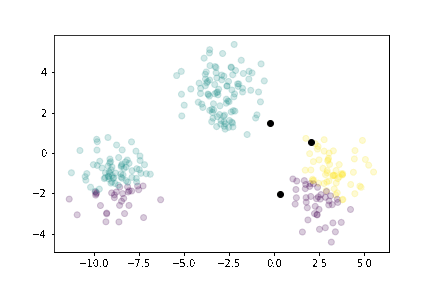

## Example with Kaggle Customer Segmentation Data

This example is based on the [Kaggle Mall Customers Dataset](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) and [Caner Dabakoglu's](https://www.kaggle.com/cdabakoglu) tutorial on the dataset. The goal is customer segmentation.

The dataset has 5 columns, `CustomerID`, `Gender`, `Age`, `Annual Income`, and `Spending score`.
We will use three of these variables, namely `Age`, `Annual Income`, and `Spending score` for segmenting customers.
(Give some thought to why we don't use `CustomerID` or `Gender`.)

First, let's import some libraries:

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Next we read the data set and print out some information about it.

In [9]:
df = pd.read_csv("Mall_Customers.csv")

print('Dataset information:\n')
df.info()
print('\nDataset head (first five rows):\n')
df.head()

Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Dataset head (first five rows):



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Let's drop the `CustomerID` column, as it's not useful.

In [10]:
df.drop(["CustomerID"], axis = 1, inplace=True)

Next, let's visualize the marginal distribution over each variable, to get an idea of how cohesive they are. We can see that the variables are not
quite Gaussian and have some skew:

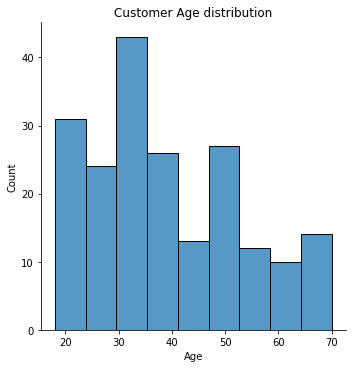

In [11]:
sns.displot(df.Age)
_ = plt.title('Customer Age distribution')

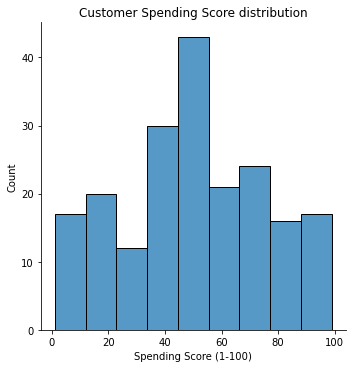

In [12]:
sns.displot(df['Spending Score (1-100)'])
_ = plt.title('Customer Spending Score distribution')

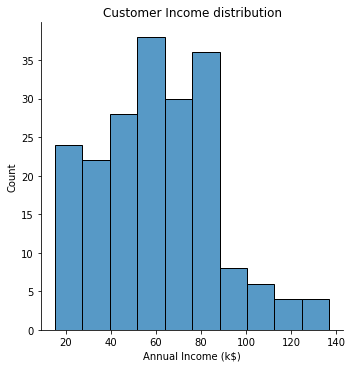

In [13]:
sns.displot(df['Annual Income (k$)'])
_ = plt.title('Customer Income distribution')

Next, let's make a 3D scatter plot of the relevant variables:

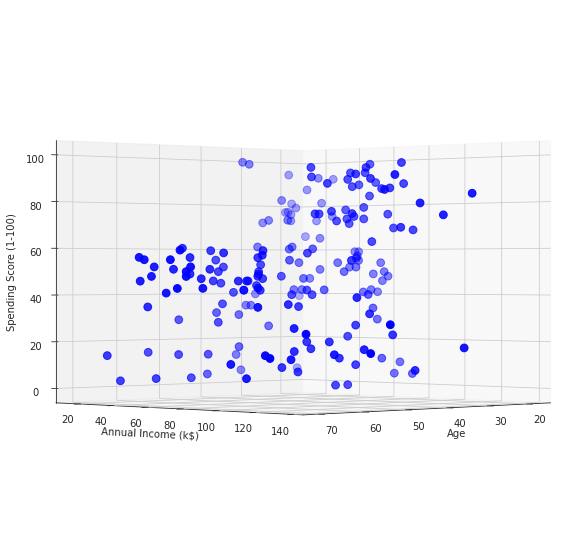

In [14]:
sns.set_style("white")
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Annual Income (k$)"], df["Spending Score (1-100)"], c='blue', s=60)
ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

Next, let's implement $k$-means:

In [15]:
# Initialize a k-means model given a dataset

def init_kmeans(X, k):
    m = X.shape[0]
    n = X.shape[1]
    means = np.zeros((k,n))
    order = np.random.permutation(m)[:k]
    for i in range(k):
        means[i,:] = X[order[i],:]
    return means

# Run one iteration of k-means

def iterate_kmeans(X, means):
    m = X.shape[0]
    n = X.shape[1]
    k = means.shape[0]
    distortion = np.zeros(m)
    c = np.zeros(m)
    for i in range(m):
        min_j = 0
        min_dist = 0
        for j in range(k):
            dist_j = np.linalg.norm(X[i,:] - means[j,:])
            if dist_j < min_dist or j == 0:
                min_dist = dist_j
                min_j = j
        distortion[i] = min_dist
        c[i] = min_j
    for j in range(k):
        means[j,:] = np.zeros((1,n))
        nj = 0
        for i in range(m):
            if c[i] == j:
                nj = nj + 1
                means[j,:] = means[j,:] + X[i,:]
        if nj > 0:
            means[j,:] = means[j,:] / nj
    return means, c, np.sum(distortion)

Let's build models with $k \in 1..20$, plot the distortion for each $k$, and try to choose a good value for $k$ using the so-called "elbow method."

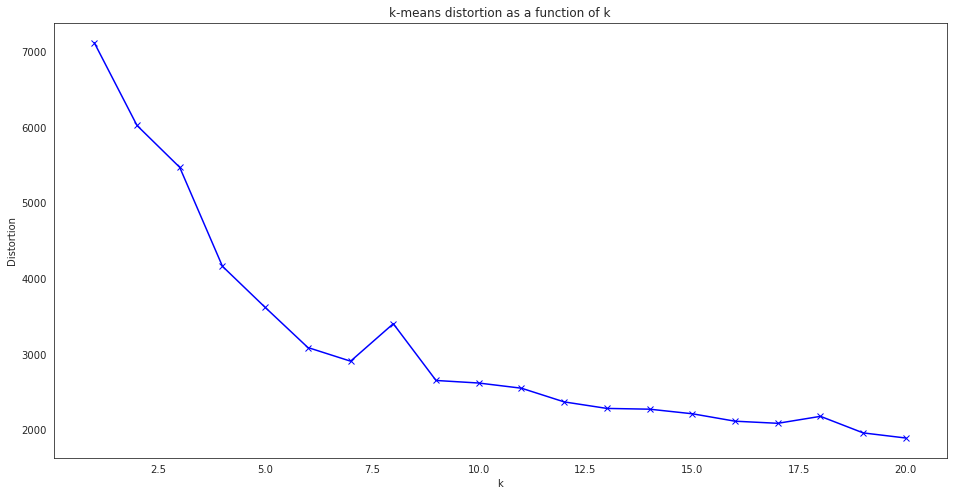

In [16]:
# Convert dataframe to matrix

X = np.array(df.iloc[:,1:])

# Intialize hyperparameters

max_k = 20
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)

distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    means = init_kmeans(X, k)
    prev_distortion = 0
    while True:
        means, c, distortion = iterate_kmeans(X, means)
        if prev_distortion > 0 and prev_distortion - distortion < epsilon:
            break
        prev_distortion = distortion
    distortions[k-1] = distortion

# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

Read about the so-called "elbow method" in [Wikipedia](https://en.wikipedia.org/wiki/Elbow_method_(clustering)). Note what it says,
that "In practice there may not be a sharp elbow, and as a heuristic method, such an 'elbow' cannot always be unambiguously identified." 

Do you see a unique elbow in the distortion plot above?

Note that the results are somewhat noisy, being dependent on initial conditions.

Here's a visualization of the results for three clusters:

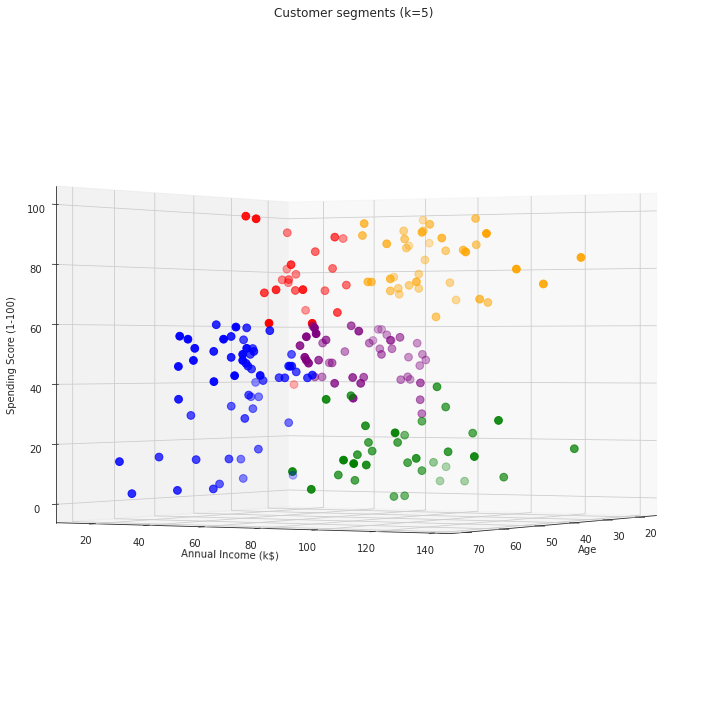

In [17]:
# Re-run k-means with k=3

k = 5
means = init_kmeans(X, k)
prev_distortion = 0
while True:
    means, c, distortion = iterate_kmeans(X, means)
    if prev_distortion > 0 and prev_distortion - distortion < epsilon:
        break
    prev_distortion = distortion
    
# Set labels in dataset to cluster IDs according to k-means model.

df["label"] = c

# Plot the data

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)

# For 5 clusters, you can uncomment the following two lines.

ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)

ax.view_init(0, 30)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer segments (k=5)')
plt.tight_layout()
plt.show()

## In-Lab Exercise 2

1. Consider the three cluster centers above. Look at the three means closely and come up with English descriptions of each cluster from a business point of view. Label the clusters in the visualization accordingly.
2. Note that the distortion plot is quite noisy due to random initial conditions. Modify the optimization to perfrom, for each $k$, several different runs, and take the minimum distortion over those runs. Re-plot the distortion plot and see if an "elbow" is more prominent.


### Exercise 2.1 (10 points)

Consider the three cluster centers above. Look at the three means closely and come up with English descriptions of each cluster from a business point of view. Label the clusters in the visualization accordingly.

In [18]:

# YOUR CODE HERE
print('Gender distribution in lable 0 is \n ', (df['Gender'].loc[df['label'] == 0].value_counts()))
print('Gender distribution in lable 1 is \n ',(df['Gender'].loc[df['label'] == 1].value_counts()))
print('Gender distribution in lable 2 is \n ',(df['Gender'].loc[df['label'] == 2].value_counts()))
print('Gender distribution in lable 3 is \n ', (df['Gender'].loc[df['label'] == 3].value_counts()))
print('Gender distribution in lable 4 is \n ',(df['Gender'].loc[df['label'] == 4].value_counts()))

print('*' * 30)
print('Average age in label 0 is ', round(df['Age'].loc[df['label'] == 0].mean(),2))
print('Average age in label 1 is ', round(df['Age'].loc[df['label'] == 1].mean(),2))
print('Average age in label 2 is ', round(df['Age'].loc[df['label'] == 2].mean(),2))
print('Average age in label 3 is ', round(df['Age'].loc[df['label'] == 3].mean(),2))
print('Average age in label 4 is ', round(df['Age'].loc[df['label'] == 4].mean(),2))

Gender distribution in lable 0 is 
  Female    33
Male      25
Name: Gender, dtype: int64
Gender distribution in lable 1 is 
  Female    14
Male      10
Name: Gender, dtype: int64
Gender distribution in lable 2 is 
  Male      19
Female    15
Name: Gender, dtype: int64
Gender distribution in lable 3 is 
  Female    21
Male      18
Name: Gender, dtype: int64
Gender distribution in lable 4 is 
  Female    29
Male      16
Name: Gender, dtype: int64
******************************
Average age in label 0 is  53.41
Average age in label 1 is  25.25
Average age in label 2 is  41.65
Average age in label 3 is  32.69
Average age in label 4 is  30.56


## English Descripitions
I have used 5 clusters instead of three. Considering annual income clustering based on the age segmentation, following clusters are generated:
1. The age group between 20-30 mostly has the low to middle income).
2. The age group between 30-40 has middle to high income
3. The annual income with low to medium are pertinent across all age groups (blue and red dots)
4. Very few customers have high annual income (cyan)

Likewise, 
K-means clustering method generated the following clusters considering the spending score and annual income :
1. customers having annual income but high spending score
2. cusomers with low to medium annual income and medium spending score
3. customers having high annual income but low spending score
4. Customer having high annual income and high spending score

This helps to formulate the strategies among the different customer segments accoring to their income and spending habit.

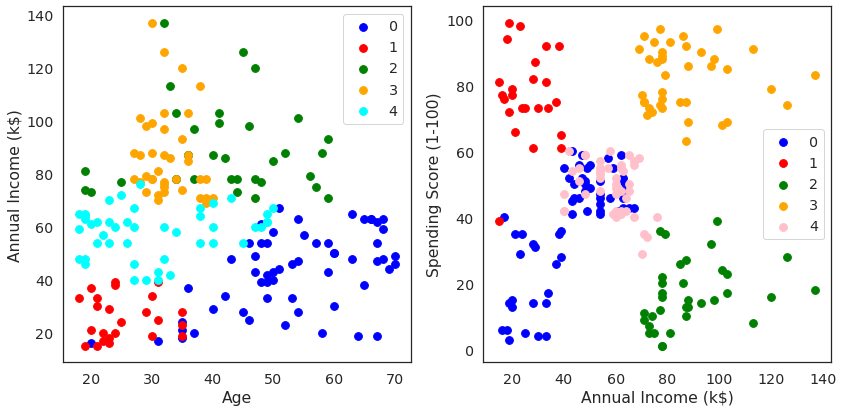

In [19]:
import seaborn as sns
sns.set(font_scale=1.3, style='white')
fig, (ax1, ax2)= plt.subplots(1,2, figsize= (12, 6))

ax1.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0],  c='blue', s=60 , label = '0')
ax1.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1],  c='red', s=60, label = '1')
ax1.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2],  c='green', s=60, label = '2')
ax1.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3],  c='orange', s=60, label = '3')
ax1.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4],  c='cyan', s=60, label = '4')
ax1.set_xlabel("Age")
ax1.set_ylabel("Annual Income (k$)")
ax1.legend()

ax2.scatter(df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0],  c='blue', s=60 , label = '0')
ax2.scatter(df["Annual Income (k$)"][df.label == 1],df["Spending Score (1-100)"][df.label == 1],  c='red', s=60, label = '1')
ax2.scatter(df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2],  c='green', s=60, label = '2')
ax2.scatter(df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3],  c='orange', s=60, label = '3')
ax2.scatter(df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4],  c='pink', s=60, label = '4')
ax2.set_xlabel("Annual Income (k$)")
ax2.set_ylabel("Spending Score (1-100)")
ax2.legend()

plt.tight_layout()

### Exercise 2.2 (20 points)

Note that the distortion plot is quite noisy due to random initial conditions. Modify the optimization to perfrom, for each $k$, several different runs, and take the minimum distortion over those runs. Re-plot the distortion plot and see if an "elbow" is more prominent.

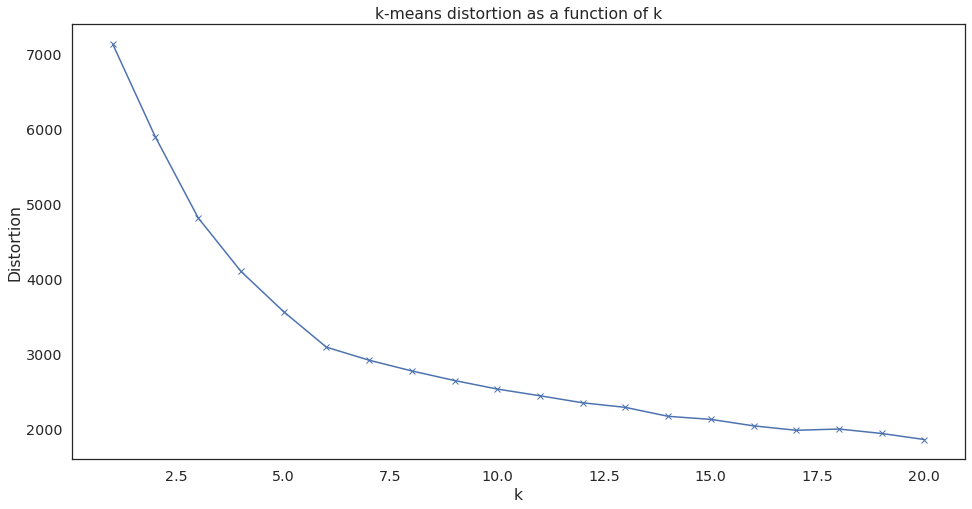

In [20]:
# YOUR CODE HERE
# YOUR CODE HERE
no_of_init = 10 #try 10 different initialisations

# Convert dataframe to matrix

X = np.array(df.iloc[:,1:])

# Intialize hyperparameters

max_k = 20
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)
distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    min_distortion = np.inf
    for _ in range(no_of_init):
        means = init_kmeans(X, k)
        new_distortion = 0
        while True:
            means, c, distortion = iterate_kmeans(X, means)
            if new_distortion > 0 and new_distortion - distortion < epsilon:
                break
            new_distortion = distortion
        if distortion < min_distortion:
            min_distortion = distortion
            min_c = c
            min_means = means
    distortions[k-1] = min_distortion

# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

The elbow seems more prominent considering the smoother curve obtained after several initializations of centers across the wider range of possibilities of the initial value. Considering the bend, the method seems to "elbow" at k=6.

## K-Means in PyTorch

Now, to get more experience with PyTorch, let's do the same thing with the library. First, some imports. You may need to install some packages for this to work:

    pip install kmeans-pytorch
    pip install tqdm
    
First, import the libraries:

In [21]:
#
!http_proxy=http://192.41.170.23:3128 https_proxy=http://192.41.170.23:3128 pip install kmeans-pytorch
#!pip install kmeans-pytorch
!pip install tqdm

In [22]:
import torch
from kmeans_pytorch import kmeans

In [23]:
x =  torch.from_numpy(X)
device = 'cuda:0'
device = 'cpu'
c, means = kmeans(X=x, num_clusters=3, distance='euclidean', device=torch.device(device))
df["label"] = c

running k-means on cpu..


[running kmeans]: 7it [00:00, 37.35it/s, center_shift=0.000000, iteration=7, tol=0.000100]   


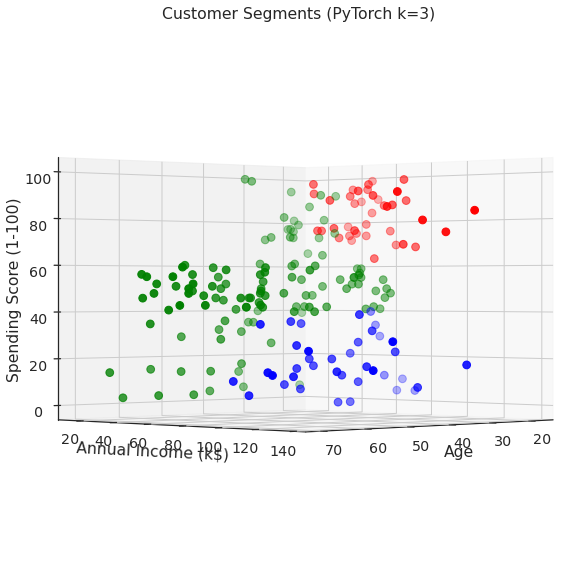

In [24]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
#ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
#ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer Segments (PyTorch k=3)')
plt.show()

## Take-Home Exercise

Find an interesting dataset for unsupervised learning, prepare the data, and run $k$-means on it.

In a brief report, describe your in-lab and take home experiments and their results.

I have used dataset from https://www.kaggle.com/arjunbhasin2013/ccdata.
This case required to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES : Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [25]:
cc_df= pd.read_csv("CC GENERAL.csv")
cc_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [26]:
#I have used 4 columns and 1000 samples for simplicity

df_cc = cc_df[['BALANCE','PURCHASES','PAYMENTS','CASH_ADVANCE']]

# check if theres any null values
df_cc.isna().sum()

BALANCE         0
PURCHASES       0
PAYMENTS        0
CASH_ADVANCE    0
dtype: int64

In [27]:
Q1 = df_cc.quantile(0.25)
Q3 = df_cc.quantile(0.75)

#we only take data within the Quartiles
df_cc = df_cc[~((df_cc < (Q1)) |(df_cc > (Q3))).any(axis=1)]

<AxesSubplot:>

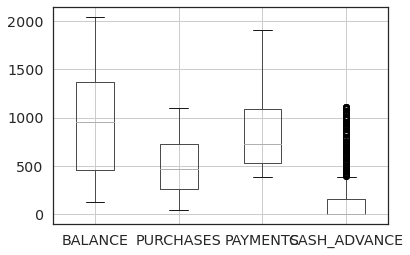

In [28]:
df_cc.boxplot()

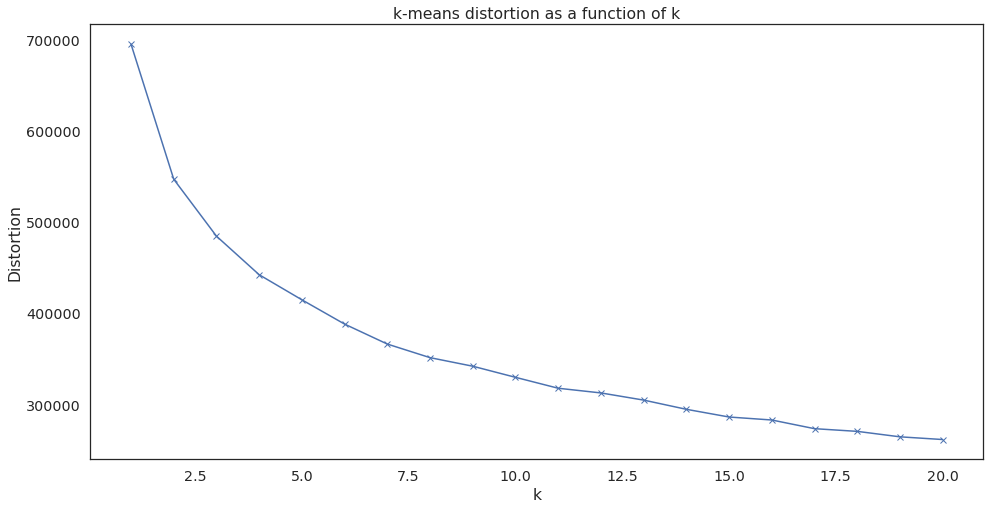

In [29]:

X = np.array(df_cc)

no_of_init = 5 #try 5 different initialisations

# Convert dataframe to matrix

# Intialize hyperparameters

max_k = 20
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)
distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    min_distortion = np.inf
    for _ in range(no_of_init):
        means = init_kmeans(X, k)
        new_distortion = 0
        while True:
            means, c, distortion = iterate_kmeans(X, means)
            if new_distortion > 0 and new_distortion - distortion < epsilon:
                break
            new_distortion = distortion
        if distortion < min_distortion:
            min_distortion = distortion
            min_c = c
            min_means = means
    distortions[k-1] = min_distortion

# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()


In [30]:
#There Seems to be a good elbow at around 4 cluster so lets try that.
x = torch.from_numpy(X)
device = 'cuda:0'
device = 'cpu'
c, means = kmeans(X=x, num_clusters=4, distance='euclidean', device=torch.device(device))
df_cc["label"] = c

running k-means on cpu..


[running kmeans]: 11it [00:00, 24.41it/s, center_shift=0.000000, iteration=11, tol=0.000100]   


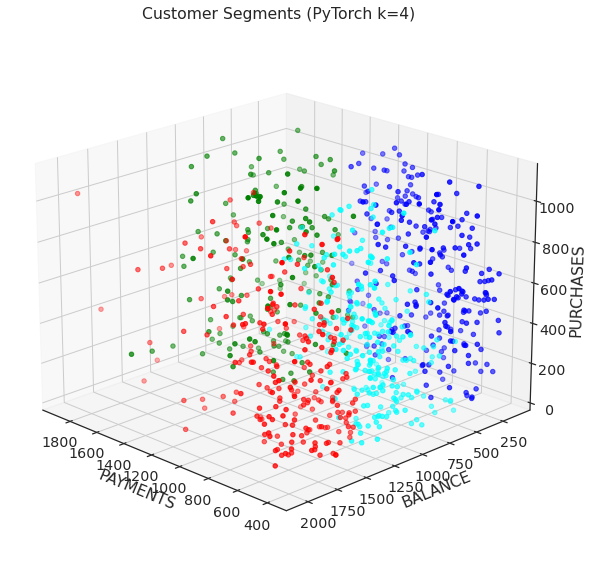

In [31]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cc.PAYMENTS[df_cc.label == 0], df_cc["BALANCE"][df_cc.label == 0], df_cc["PURCHASES"][df_cc.label == 0], c='blue' )
ax.scatter(df_cc.PAYMENTS[df_cc.label == 1], df_cc["BALANCE"][df_cc.label == 1], df_cc["PURCHASES"][df_cc.label == 1], c='red' )
ax.scatter(df_cc.PAYMENTS[df_cc.label == 2], df_cc["BALANCE"][df_cc.label == 2], df_cc["PURCHASES"][df_cc.label == 2], c='green' )
ax.scatter(df_cc.PAYMENTS[df_cc.label == 3], df_cc["BALANCE"][df_cc.label == 3], df_cc["PURCHASES"][df_cc.label == 3], c='cyan')
ax.view_init(20, 135)
plt.xlabel("PAYMENTS")
plt.ylabel("BALANCE")
ax.set_zlabel('PURCHASES')
plt.title('Customer Segments (PyTorch k=4)')
plt.show()

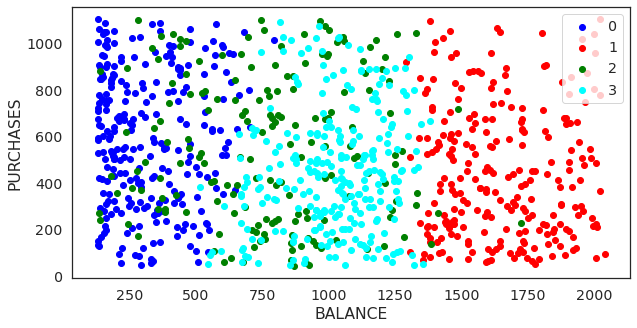

In [32]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(df_cc["BALANCE"][df_cc.label == 0], df_cc["PURCHASES"][df_cc.label == 0], c='blue',label = 0 )
ax.scatter(df_cc["BALANCE"][df_cc.label == 1], df_cc["PURCHASES"][df_cc.label == 1], c='red',label = 1)
ax.scatter(df_cc["BALANCE"][df_cc.label == 2], df_cc["PURCHASES"][df_cc.label == 2], c='green',label = 2 )
ax.scatter(df_cc["BALANCE"][df_cc.label == 3], df_cc["PURCHASES"][df_cc.label == 3], c='cyan',label = 3 )
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")
plt.legend()
plt.show()

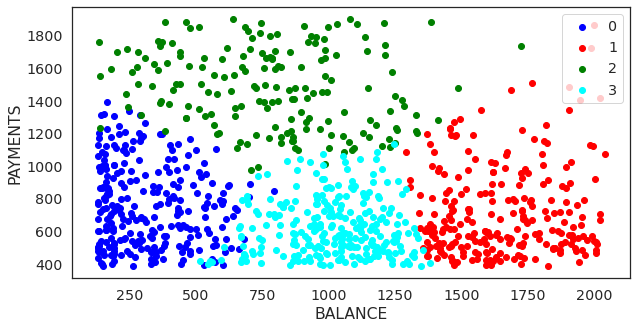

In [33]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(df_cc["BALANCE"][df_cc.label == 0], df_cc["PAYMENTS"][df_cc.label == 0], c='blue', label = 0 )
ax.scatter(df_cc["BALANCE"][df_cc.label == 1], df_cc["PAYMENTS"][df_cc.label == 1], c='red',label = 1 )
ax.scatter(df_cc["BALANCE"][df_cc.label == 2], df_cc["PAYMENTS"][df_cc.label == 2], c='green',label = 2 )
ax.scatter(df_cc["BALANCE"][df_cc.label == 3], df_cc["PAYMENTS"][df_cc.label == 3], c='cyan',label = 3 )
plt.xlabel("BALANCE")
plt.ylabel("PAYMENTS")
plt.legend()
plt.show()

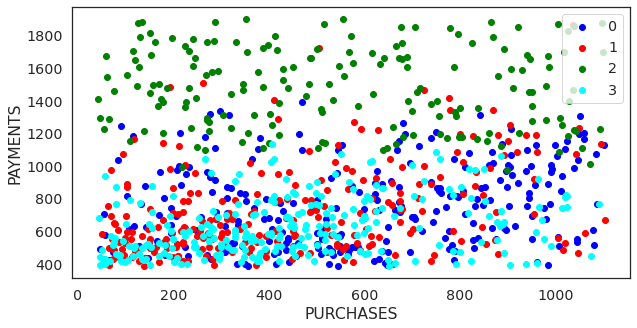

In [34]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(df_cc["PURCHASES"][df_cc.label == 0], df_cc["PAYMENTS"][df_cc.label == 0], c='blue', label = 0 )
ax.scatter(df_cc["PURCHASES"][df_cc.label == 1], df_cc["PAYMENTS"][df_cc.label == 1], c='red',label = 1 )
ax.scatter(df_cc["PURCHASES"][df_cc.label == 2], df_cc["PAYMENTS"][df_cc.label == 2], c='green',label = 2 )
ax.scatter(df_cc["PURCHASES"][df_cc.label == 3], df_cc["PAYMENTS"][df_cc.label == 3], c='cyan',label = 3 )
plt.xlabel("PURCHASES")
plt.ylabel("PAYMENTS")
plt.legend()
plt.show()

## Explanation
We can see from the aobve plots that the 4 clusters are most distinct with the balance and paymentsPurchase seem to be evenly distributed across the all the clusters. Ignoring the people with 0 Cash_Advance we can see that is also evenly distributed among the 4 clusters. The major separators are the Balance and Payments.

Cluster 0 includes people with low to average balance and with high payments.

Cluster 1 includes people iwht medium balance and low payments

CLuster 2 includes people with low payments and low balance

cluster 3 includes people with high balances and low payments. These people seem to be money savers.

## Principle Component Analysis (PCA)

PCA or Principal Component Analysis is a data transformation tecnique for decreasing dimensions or features. This technique is useful for decreasing the complexity of a data set and for visualization.

In visualization, you want to see your data as lines, points, and a point cloud. It is easy to see if it is three dimensions or less. What about four dimesions? Oh no, we cannot show it clearly, so further
decreasing dimensionality might help.

In machine learning, having many features as possible might be useful for accurate modeling accurately. However, it is not every case that too much information could help such as unrelated features, features that are dependent 
on each other, or simply too many features (the curse of dimensionality).

## What happens after PCA?

Main concept of PCA is to find a new axis which can project a lot of data features as much as possible. The new axis is come from those features, so the new data still keep variance of data same as before decreasing dimensions.

![pca](PCA1.png)

Assume you have $n$ set of data with $d$ features which tell you from the smallest thing (such as atom). After using PCA, you will get the $n$ set of data with $k$ features which tell you in group of things.

![pca](PCA2.png)


### Mathematics of PCA

Assume $w$ is a unit vector along the axis
along which the data vary as much as possible, and mean vector $\mu=\frac{1}{m}\sum_{i=1}^mx^{(i)}$.

\begin{equation}
w_1 = \text{argmax}_w \frac{1}{m} \sum_{i=1}^m (w^T(x^{(i)}-\mu))^2 \\
= \text{argmax}_w \frac{1}{m} \sum_{i=1}^m (w^T(x^{(i)}-\mu)(x^{(i)}-\mu)^Tw) \\
= \text{argmax}_w w^T \color{red}{S}w
\end{equation}

In this case $S$ is the **covariance matrix** of the dataset $\mathtt{X}$.

### Step By Step Computation in PCA

The below steps need to be followed to perform dimensionality reduction using PCA:

1. Standardization of the data
2. Computing the covariance matrix
3. Calculating the eigenvectors and eigenvalues
4. Computing the principal components
5. Reducing the dimensions of the data set

#### Let's start

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA
import seaborn

Load movie names and movie ratings

In [36]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
ratings.drop(['timestamp'], axis=1, inplace=True)

In [37]:
n_ratings = len(ratings)
n_movies = ratings['movieId'].nunique()
n_users = ratings['userId'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 100836
Number of unique movieId's: 9724
Number of unique users: 610
Average number of ratings per user: 165.3
Average number of ratings per movie: 10.37


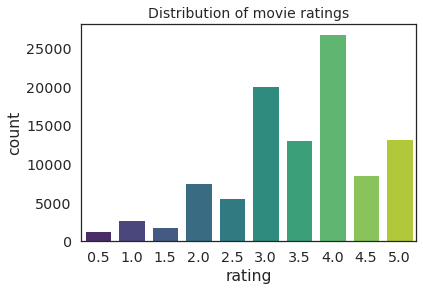

In [38]:
seaborn.countplot(x="rating", data=ratings, palette="viridis")
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

**Formatting the data**

In [39]:
def replace_name(x):
    return movies[movies['movieId']==x].title.values[0]

ratings.movieId = ratings.movieId.map(replace_name)
M = ratings.pivot_table(index=['userId'], columns=['movieId'], values='rating')
m = M.shape
df1 = M.replace(np.nan, 0, regex=True)

### 1) Standardization of the data

Standardization is the way to scale data into same scale. Because some information such as housing price (10,000-100,000 us) and area size (100-1000$m^2$) are not the same scale. It makes impact in one data, but another has lower impact.

Standardization can be calculated in many way. One of the equation is:

\begin{equation}
Z = \frac{x - \mu}{\sigma}
\end{equation}

In [40]:
X_std = StandardScaler().fit_transform(df1)

### 2) Compute the covariance matrix

Covariance matrix is a $p\times p$ matrix where $p$ represents the dimension of the dataset. Each entry in the matrix represents the covariance of the corresponding variables.

For 2-dimensional dataset with variable $a$ and $b$, the covariance matrix is $2\times 2$ matrix as:

\begin{equation}
S=\begin{bmatrix}
cov(a,a) & cov(a,b) \\ 
cov(b,a) & cov(b,b)
\end{bmatrix} = (x_t-\mu)(x_t-\mu)^T
\end{equation}

We can say that $cov(a,b)=cov(b,a)$.

In [41]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix n%s' %cov_mat)

Covariance matrix n[[ 1.00164204 -0.00164473 -0.00232791 ...  0.32582147 -0.00819887
  -0.00164473]
 [-0.00164473  1.00164204  0.70768614 ... -0.00360024 -0.00819887
  -0.00164473]
 [-0.00232791  0.70768614  1.00164204 ... -0.00509569 -0.01160448
  -0.00232791]
 ...
 [ 0.32582147 -0.00360024 -0.00509569 ...  1.00164204 -0.01794692
  -0.00360024]
 [-0.00819887 -0.00819887 -0.01160448 ... -0.01794692  1.00164204
  -0.00819887]
 [-0.00164473 -0.00164473 -0.00232791 ... -0.00360024 -0.00819887
   1.00164204]]


### 3) Calculating the Eigenvectors and Eigenvalues

Eigenvectors and eigenvalues are the mathematical constructs that must be computed from the covariance matrix in order to determine the principal components of the data set.

**What are Principal Components?**

Principal components are the new set of variables that are obtained from the initial set of variables. The principal components are computed in such a manner that newly obtained variables are highly significant and independent of each other. The principal components compress and possess most of the useful information that was scattered among the initial variables.

*If dataset of 5 dimensions, then 5 principal components are computed, such that, the first principal component stores the maximum possible information and the second one stores the remaining maximum info and so on, you get the idea.*

**Eigenvectors fall into this process**

Consider a 2-Dimensional data set, for which 2 eigenvectors (and their respective eigenvalues) are computed. The idea behind eigenvectors is to use the Covariance matrix to understand where in the data there is the most amount of variance. Since more variance in the data denotes more information about the data, eigenvectors are used to identify and compute Principal Components


Eigenvalues, on the other hand, simply denote the scalars of the respective eigenvectors. Therefore, eigenvectors and eigenvalues will compute the Principal Components of the data set.

In [42]:
#Calculating eigenvectors and eigenvalues on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors n%s' %eig_vecs)
print('nEigenvalues n%s' %eig_vals)

Eigenvectors n[[-6.17879786e-03+0.00000000e+00j  7.13214703e-03+0.00000000e+00j
   3.60191232e-03+0.00000000e+00j ...  4.16106222e-08+0.00000000e+00j
  -5.30309804e-09-1.66865989e-09j -5.30309804e-09+1.66865989e-09j]
 [-1.37389338e-04+0.00000000e+00j -6.19748724e-05+0.00000000e+00j
  -2.68242736e-06+0.00000000e+00j ... -1.26621092e-08+0.00000000e+00j
   2.58924425e-09+3.06153285e-10j  2.58924425e-09-3.06153285e-10j]
 [ 3.98116838e-05+0.00000000e+00j -1.70073920e-04+0.00000000e+00j
  -3.54723573e-05+0.00000000e+00j ...  1.39702005e-08+0.00000000e+00j
  -4.12398935e-09-6.60926197e-11j -4.12398935e-09+6.60926197e-11j]
 ...
 [-5.71402600e-03+0.00000000e+00j  4.61929109e-03+0.00000000e+00j
   3.30601109e-03+0.00000000e+00j ... -1.07584079e-06+0.00000000e+00j
   6.56132116e-07-7.73621493e-08j  6.56132116e-07+7.73621493e-08j]
 [-1.45210348e-02+0.00000000e+00j -3.31390410e-04+0.00000000e+00j
   3.25182697e-03+0.00000000e+00j ...  3.43438555e-07+0.00000000e+00j
  -1.59358532e-07+6.23062538e-09j

**Compute the feature vector**

Rearrange the eigenvalues in descending order. This represents the significance of the principal components in descending order:

In [43]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
694.6347372544967
487.2206886294058
438.98894895557424
379.0404527252994
324.3162458652479
259.1091962886271
251.67075199496617
226.08065316490595
206.77043202389675
186.08012008011966
180.35681567362798
150.57689826878493
140.5335104255658
135.00425543775623
116.759311213556
111.22844429826331
105.98588556400031
101.52061108863398
92.38143975955767
87.20146448316905
83.94704525828489
76.51329078142065
73.12943769509882
71.33450019035222
68.66916875072957
68.11563805135066
66.09778445224137
64.797728865197
64.76738664207964
60.575410168022856
60.095701576953566
58.44406220313063
57.143880762362635
55.70369700851542
55.153276987646805
54.4236166816642
53.623116971407505
49.75425330272148
49.22568958301028
47.79220889336276
46.743581142451106
46.44527988080568
45.33955134746948
45.09994762096568
44.6198659664408
44.25650246763797
43.96138776159148
42.67209649629787
41.738887045202
41.05033324888557
41.226910399686936
40.021144104127195
39.19814382275322
3

### 4) Computing the Principal Components
Once we have computed the Eigenvectors and eigenvalues, all we have to do is order them in the descending order, where the eigenvector with the highest eigenvalue is the most significant and thus forms the first principal component. The principal components of lesser significances can thus be removed in order to reduce the dimensions of the data.

The final step in computing the Principal Components is to form a matrix known as the feature matrix that contains all the significant data variables that possess maximum information about the data.

In [44]:
pca = PCA(n_components=2)
pca.fit_transform(df1)
print(pca.explained_variance_ratio_)

[0.13502694 0.04383615]


### 5) Reducing the dimensions of the data set

To perform PCA is to re-arrange the original data with the final principal components which represent the maximum and the most significant information of the data set. In order to replace the original data axis with the newly formed Principal Components, you simply multiply the transpose of the original data set by the transpose of the obtained feature vector.

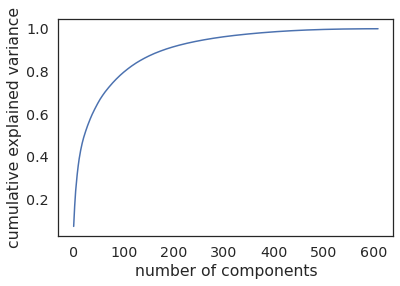

In [45]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## Take Home Exercise

Use [Siricon wafer thickness](https://openmv.net/info/silicon-wafer-thickness) dataset which contains data
- $N=184$
- $k=9$

1. Build a PCA model on all the data.
2. Plot the scores for the first two components. What do you notice? Investigate the outliers, and the raw data for each of these unusual observations. What do you conclude about those observations?

In [46]:
wafers = pd.read_csv('silicon-wafer-thickness.csv')
wafers.head()

FileNotFoundError: [Errno 2] No such file or directory: 'silicon-wafer-thickness.csv'

In [ ]:
wafers.describe()

In [ ]:
Xnew_scaled = StandardScaler().fit_transform(wafers)
Xne_scaled[:,2]

In [ ]:
vec_newMean = np.mean(Xnew_scaled, axis=0)
covNew_mat = (Xnew_scaled - vec_newMean).T.dot((Xnew_scaled - vec_newMean)) / (Xnew_scaled.shape[0]-1)
print('Covariance matrix n%s' %covNew_mat)

In [ ]:
#Calculating eigenvectors and eigenvalues on covariance matrix
covNew_mat = np.cov(Xnew_scaled.T)
new_eig_vals, new_eig_vecs = np.linalg.eig(covNew_mat)
print('Eigenvectors n%s' %new_eig_vecs)
print('nEigenvalues n%s' %new_eig_vals)

In [ ]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

In [ ]:
pca = PCA(n_components=2)
pca.fit_transform(wafers)
print(pca.explained_variance_ratio_)

In [ ]:
# reduce the dimension of the data
pca = PCA().fit(Xnew_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()